<a href="https://colab.research.google.com/github/GHooN99/My_study2/blob/master/colab/kaggle_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c sejongai-challenge-pretest-2

2020.AI.bike-submission.csv: Skipping, found more recently modified local copy (use --force to force download)
2020.AI.bike-test.csv: Skipping, found more recently modified local copy (use --force to force download)
2020.AI.bike-train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!ls

 2020.AI.bike-submission.csv   2020.AI.bike-train.csv   kaggle.json
 2020.AI.bike-test.csv	      'kaggle (1).json'         sample_data


In [5]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import missingno as msno

In [71]:
data = pd.read_csv("2020.AI.bike-train.csv")
data.head(7)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0


In [7]:
data.shape

(1000, 11)

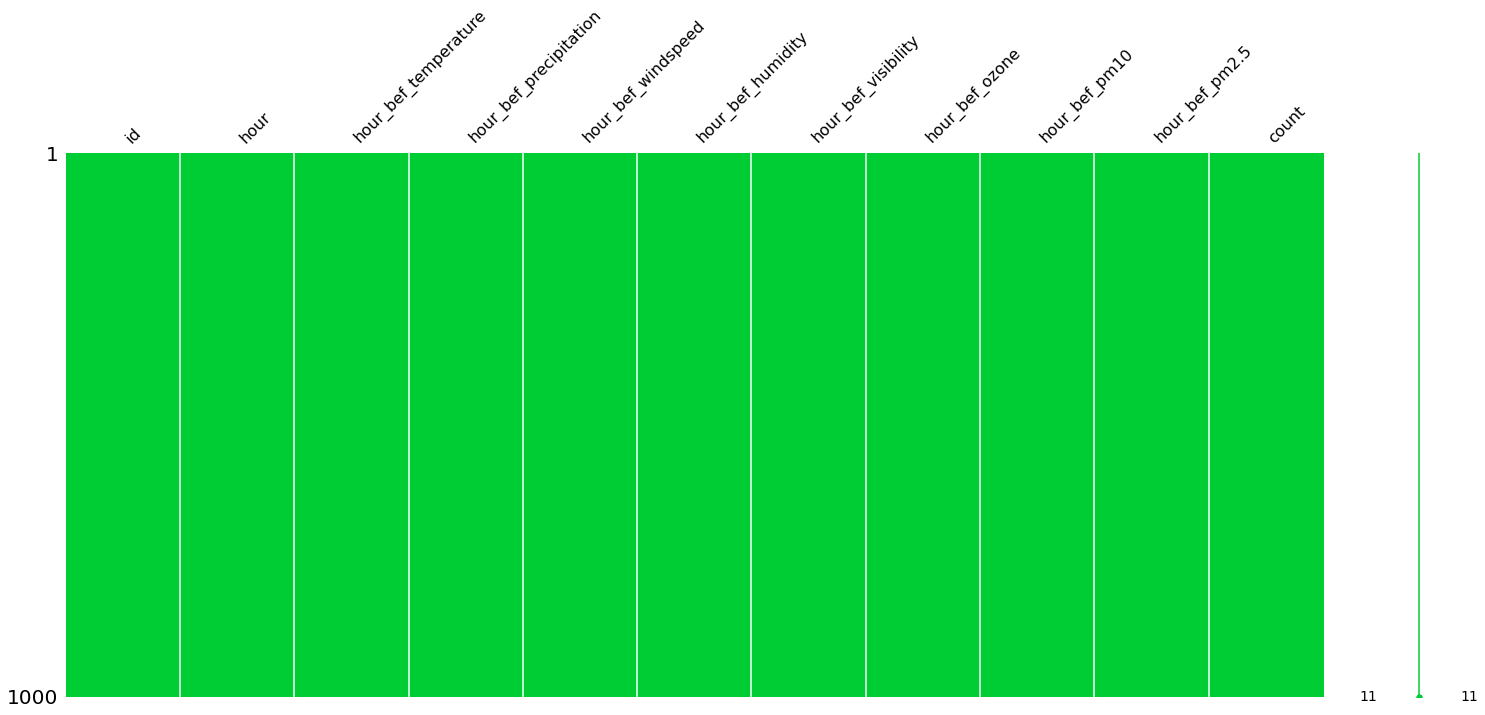

In [48]:
msno.matrix(data,color=(0.0,0.8,0.2))

In [72]:
df= data
df = df.drop(['count'],axis=1)
df =df.drop(['hour'],axis=1)
df = df.drop(['hour_bef_precipitation'],axis=1)
normalization_df = (df - df.mean())/df.std()
normalization_df

,id,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,-1.730528,-0.101796,-0.695595,1.823115,-1.451886,-0.593638,0.602392,0.189371
1,-1.724261,0.629439,-0.767707,-0.197749,-0.861446,0.182021,0.504975,0.670358
2,-1.722172,-0.563628,-1.272493,1.330221,-0.052197,-0.283374,-0.826385,-0.772601
3,-1.720083,-1.679724,0.169752,0.097987,-0.809349,0.078600,0.569919,2.319454
4,-1.717994,2.438284,1.684110,-2.218612,1.021014,0.957680,-0.988746,-1.322300
...,...,...,...,...,...,...,...,...
995,1.703722,0.687168,0.818763,-1.972166,1.021014,0.440574,-1.118635,-1.184875
996,1.707900,0.321551,1.179324,-1.380693,-0.977798,1.319654,1.121947,3.624988
997,1.709989,-0.140282,-1.344606,0.393723,1.021014,-0.541927,-0.599079,-0.154190
998,1.714167,0.167607,-0.118697,-0.986378,0.932448,-0.076532,0.212725,-0.566464


In [74]:
normalization_df['hour_bef_precipitation']=data['hour_bef_precipitation']
normalization_df['hour']=data['hour']
normalization_df
x_data = normalization_df.iloc[:,1:]
x_data = x_data.drop(['hour_bef_pm10'],axis=1)
x_data = x_data.drop(['hour_bef_windspeed'],axis=1)
x_data

,hour_bef_temperature,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm2.5,hour_bef_precipitation,hour
0,-0.101796,1.823115,-1.451886,-0.593638,0.189371,1.0,20
1,0.629439,-0.197749,-0.861446,0.182021,0.670358,0.0,13
2,-0.563628,1.330221,-0.052197,-0.283374,-0.772601,0.0,6
3,-1.679724,0.097987,-0.809349,0.078600,2.319454,0.0,23
4,2.438284,-2.218612,1.021014,0.957680,-1.322300,0.0,18
...,...,...,...,...,...,...,...
995,0.687168,-1.972166,1.021014,0.440574,-1.184875,0.0,14
996,0.321551,-1.380693,-0.977798,1.319654,3.624988,0.0,15
997,-0.140282,0.393723,1.021014,-0.541927,-0.154190,0.0,4
998,0.167607,-0.986378,0.932448,-0.076532,-0.566464,0.0,16


In [75]:
y_data = data.iloc[:,-1]
y_data

0       49.0
1      159.0
2       26.0
3       57.0
4      431.0
       ...  
995    108.0
996     78.0
997     27.0
998    118.0
999      5.0
Name: count, Length: 1000, dtype: float64

In [ ]:
with tf.device('/device:GPU:0'):  
  model = Sequential()
  model.add(Dense(32,input_dim=7,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(1))
  optim = optimizers.RMSprop(learning_rate=0.0175)

  model.compile(optimizer=optim,loss='mse')
  model.fit(x_data,y_data,batch_size=32,epochs=1000)

In [139]:
test_data = pd.read_csv("2020.AI.bike-test.csv")
test_data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,1655,4,14.6,0.0,0.6,49.0,2000.0,0.014,41.0,27.0
1,1657,20,21.8,0.0,4.4,40.0,2000.0,0.048,35.0,19.0
2,1660,22,18.3,0.0,1.0,37.0,970.0,0.032,169.0,38.0
3,1662,7,13.2,0.0,0.6,85.0,431.0,0.023,50.0,39.0
4,1663,8,8.9,0.0,0.9,77.0,613.0,0.005,82.0,40.0


In [140]:
df = test_data
df =df.drop(['hour'],axis=1)
df = df.drop(['hour_bef_precipitation'],axis=1)
normalization_df_1 = (df - df.mean())/df.std()
normalization_df_1

,id,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,-1.789140,-0.459489,-1.433146,-0.093880,0.995374,-1.372172,-0.507873,-0.248055
1,-1.776142,0.923736,1.336414,-0.548304,0.995374,0.358296,-0.692058,-0.769688
2,-1.756643,0.251335,-1.141613,-0.699779,-0.772292,-0.456042,3.421427,0.469190
3,-1.743644,-0.728449,-1.433146,1.723815,-1.697313,-0.914107,-0.231594,0.534394
4,-1.737145,-1.554542,-1.214496,1.319882,-1.384968,-1.830237,0.750731,0.599599
...,...,...,...,...,...,...,...,...
322,1.584080,-0.036837,-0.704314,0.108086,0.995374,-0.506938,-0.630663,-0.248055
323,1.590579,-1.189524,0.899115,-0.295846,0.995374,-0.099769,-0.722756,-0.769688
324,1.597078,0.251335,-0.485665,0.158577,0.995374,-1.626653,-0.845547,-0.639279
325,1.610077,0.712410,0.826232,-0.699779,-0.042915,2.088765,0.413057,0.338782


In [141]:
normalization_df_1['hour_bef_precipitation']=test_data['hour_bef_precipitation']
normalization_df_1['hour']=test_data['hour']
normalization_df_1

,id,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_bef_precipitation,hour
0,-1.789140,-0.459489,-1.433146,-0.093880,0.995374,-1.372172,-0.507873,-0.248055,0.0,4
1,-1.776142,0.923736,1.336414,-0.548304,0.995374,0.358296,-0.692058,-0.769688,0.0,20
2,-1.756643,0.251335,-1.141613,-0.699779,-0.772292,-0.456042,3.421427,0.469190,0.0,22
3,-1.743644,-0.728449,-1.433146,1.723815,-1.697313,-0.914107,-0.231594,0.534394,0.0,7
4,-1.737145,-1.554542,-1.214496,1.319882,-1.384968,-1.830237,0.750731,0.599599,0.0,8
...,...,...,...,...,...,...,...,...,...,...
322,1.584080,-0.036837,-0.704314,0.108086,0.995374,-0.506938,-0.630663,-0.248055,0.0,4
323,1.590579,-1.189524,0.899115,-0.295846,0.995374,-0.099769,-0.722756,-0.769688,0.0,3
324,1.597078,0.251335,-0.485665,0.158577,0.995374,-1.626653,-0.845547,-0.639279,0.0,5
325,1.610077,0.712410,0.826232,-0.699779,-0.042915,2.088765,0.413057,0.338782,0.0,21


In [142]:
test_data = normalization_df_1.iloc[:,1:]
test_data = test_data.drop(['hour_bef_pm10'],axis=1)
test_data = test_data.drop(['hour_bef_windspeed'],axis=1)
test_data

,hour_bef_temperature,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm2.5,hour_bef_precipitation,hour
0,-0.459489,-0.093880,0.995374,-1.372172,-0.248055,0.0,4
1,0.923736,-0.548304,0.995374,0.358296,-0.769688,0.0,20
2,0.251335,-0.699779,-0.772292,-0.456042,0.469190,0.0,22
3,-0.728449,1.723815,-1.697313,-0.914107,0.534394,0.0,7
4,-1.554542,1.319882,-1.384968,-1.830237,0.599599,0.0,8
...,...,...,...,...,...,...,...
322,-0.036837,0.108086,0.995374,-0.506938,-0.248055,0.0,4
323,-1.189524,-0.295846,0.995374,-0.099769,-0.769688,0.0,3
324,0.251335,0.158577,0.995374,-1.626653,-0.639279,0.0,5
325,0.712410,-0.699779,-0.042915,2.088765,0.338782,0.0,21


In [143]:
test_y = model.predict(test_data)
test_y.flatten()

array([ 11.211711 , 198.03856  , 117.78779  ,  22.626575 ,  44.71602  ,
       326.2255   ,  44.87211  , 179.79022  , 110.78004  , 122.279655 ,
       -10.5323925, 132.21086  ,  15.978031 ,  19.695879 , 199.43002  ,
        96.94702  ,  98.49512  , 243.244    ,  94.19575  , 103.69462  ,
       220.13876  , 132.39178  ,  32.309906 , 127.39203  , 211.5837   ,
       151.16876  , 194.86081  , 130.2816   , 153.86667  , 117.0345   ,
        -4.0809383,  35.615986 ,  70.05585  , 120.23592  ,  93.08151  ,
       248.9381   , 102.71325  , 111.21208  ,  26.46239  , 133.53146  ,
        92.550285 ,  83.91743  , 150.14311  , 198.60258  , 139.00957  ,
       176.63197  ,  63.225357 ,  17.382927 , 111.31648  ,  41.48923  ,
        75.68994  , 209.2838   ,  46.45102  , 123.484085 , 201.55284  ,
        12.95047  , 155.89793  ,  85.017006 , 155.90315  , 226.4892   ,
       124.73789  , 143.05043  , 142.47473  ,  93.97126  ,  17.02669  ,
       133.57613  , 163.60925  ,  93.48931  , 102.38974  ,   2.5

In [144]:
test_y.shape

(327, 1)

In [145]:
test_y = test_y.astype(int)
result = pd.DataFrame({'id':range(0,327),'count':test_y.flatten()})
result

,id,count
0,0,11
1,1,198
2,2,117
3,3,22
4,4,44
...,...,...
322,322,14
323,323,15
324,324,19
325,325,170


In [146]:
result.to_csv("result.csv",index=False,header=True)
print("done!")

done!


In [ ]:
!kaggle competitions submit -c sejongai-challenge-pretest-2 -f result.csv -m "First submit"